# Image Classification Using Neural Networks: The CIFAR - 10 Dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Loading the CIFAR-10 Dataset 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



2024-11-11 14:52:24.306076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("The Training data shape:", x_train.shape)
print("The Training labels shape:", y_train.shape)
print("The Test data shape:", x_test.shape)
print("The Test labels shape:", y_test.shape)
print("The Number of classes:", len(np.unique(y_train)))


The Training data shape: (50000, 32, 32, 3)
The Training labels shape: (50000, 1)
The Test data shape: (10000, 32, 32, 3)
The Test labels shape: (10000, 1)
The Number of classes: 10


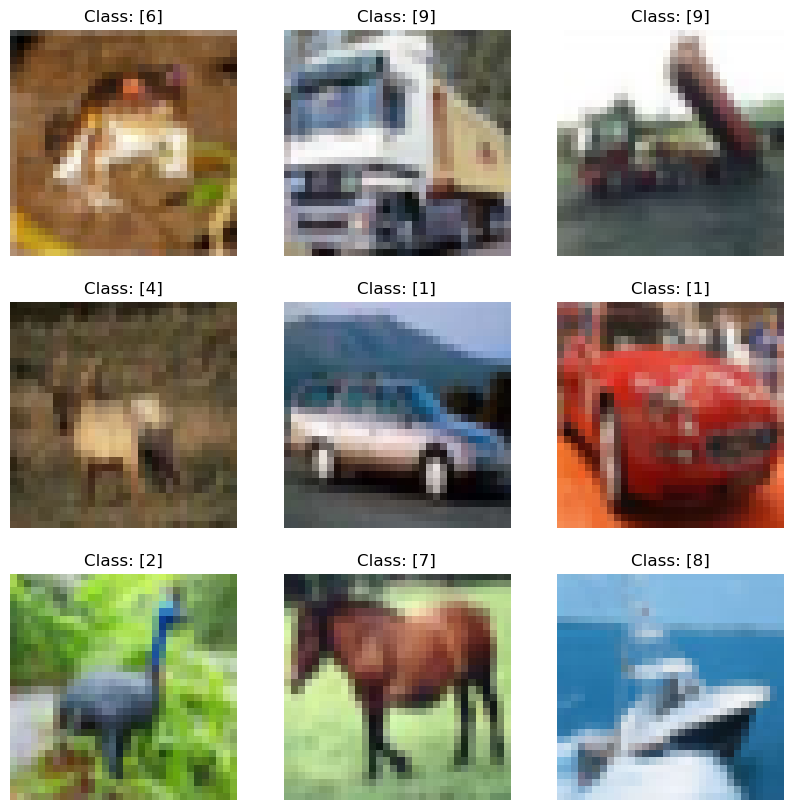

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for j, axi in enumerate(axes.flat):
    axi.imshow(x_train[j])
    axi.axis('off')
    axi.set_title("Class: {}".format(y_train[j]))
plt.show()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import to_categorical

tot_cls = 10
y_train = to_categorical(y_train, tot_cls)
y_test= to_categorical(y_test, tot_cls)



In [4]:

from keras.models import Sequential
from keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#nn_model = Sequential()
nn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])



/Users/harshitapaila/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.optimizers import Adam

nn_model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [8]:
history = nn_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.2099 - loss: 2.1086 - val_accuracy: 0.3975 - val_loss: 1.6383
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.3981 - loss: 1.6393 - val_accuracy: 0.4740 - val_loss: 1.4569
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.4551 - loss: 1.4952 - val_accuracy: 0.5090 - val_loss: 1.3838
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.4917 - loss: 1.3975 - val_accuracy: 0.5330 - val_loss: 1.3045
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.5215 - loss: 1.3316 - val_accuracy: 0.5559 - val_loss: 1.2446
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5462 - loss: 1.2688 - val_accuracy: 0.5621 - val_loss: 1.2258
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5640 - loss: 1.2326 - val_accuracy: 0.5834 - val_loss: 1.1697
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5854 - loss: 1.1682 - 

In [9]:
tl, ta = nn_model.evaluate(x_test, y_test)


print(f"The Test Loss: {tl}")
print(f"The Test Accuracy: {ta}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7365 - loss: 0.8448
The Test Loss: 0.8456794023513794
The Test Accuracy: 0.7329999804496765


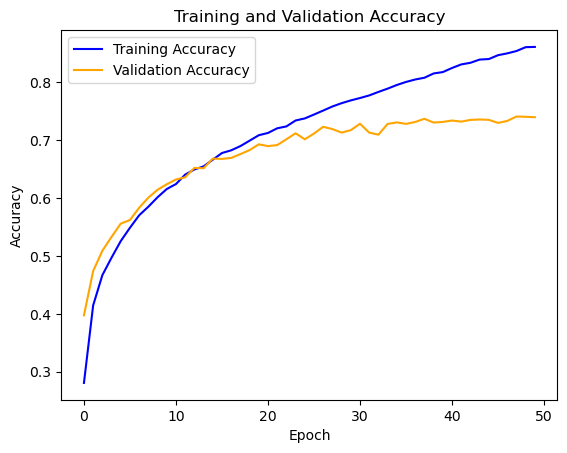

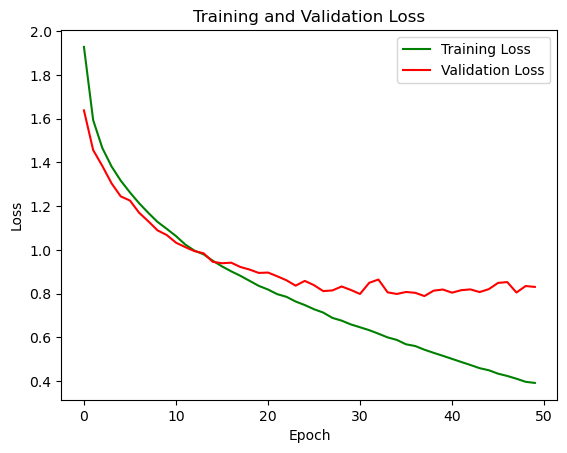

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [11]:
predictions = nn_model.predict(x_test)
pred_cls = predictions.argmax(axis=1)  




313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


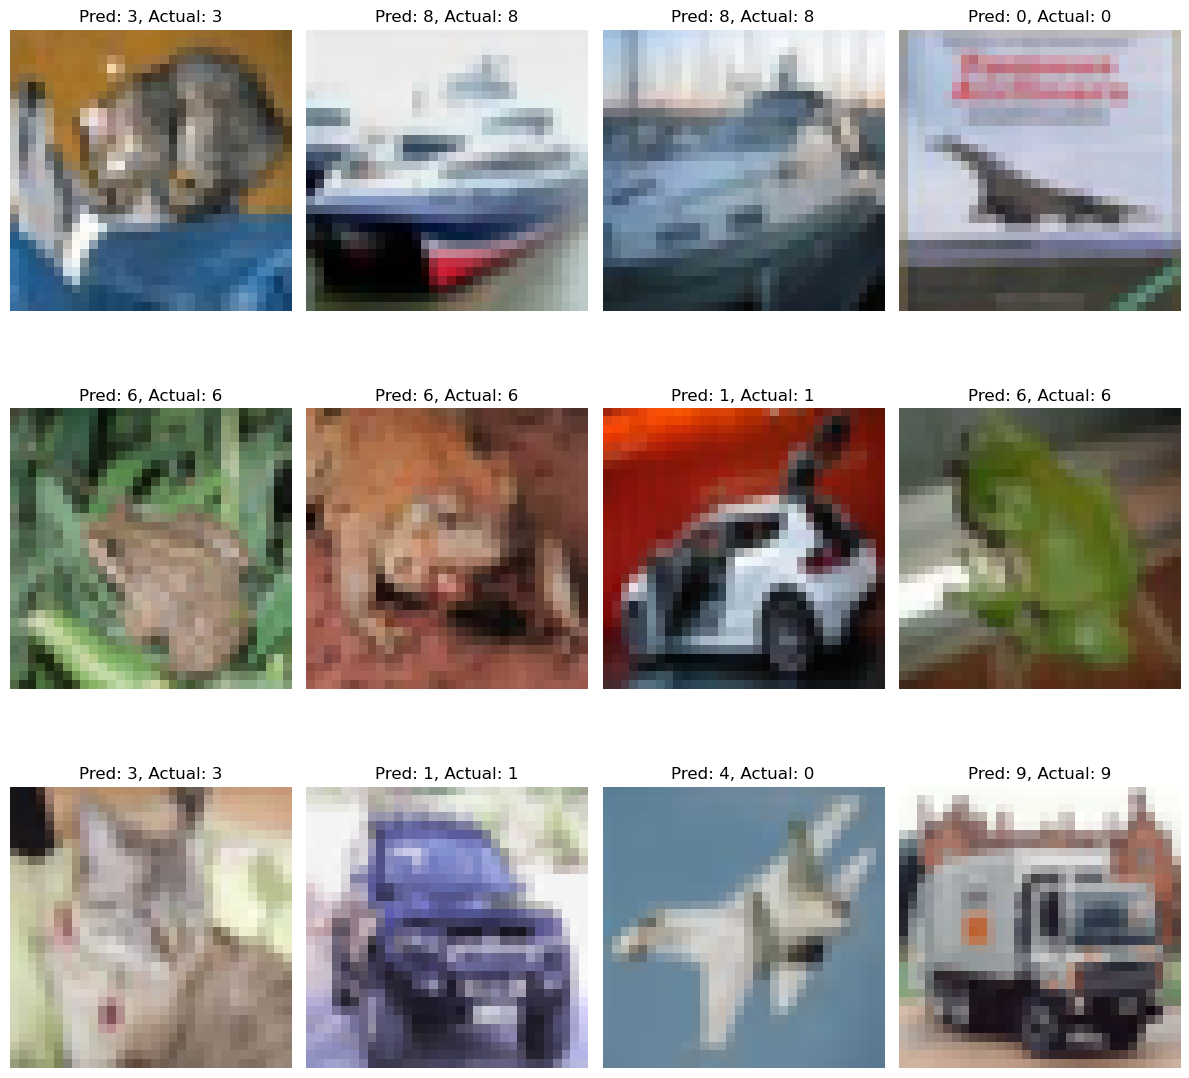

In [12]:
ac_cls = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 12))
for j in range(12):
    plt.subplot(3, 4, j + 1)
    plt.imshow(x_test[j])
    plt.title(f"Pred: {pred_cls[j]}, Actual: {ac_cls[j]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


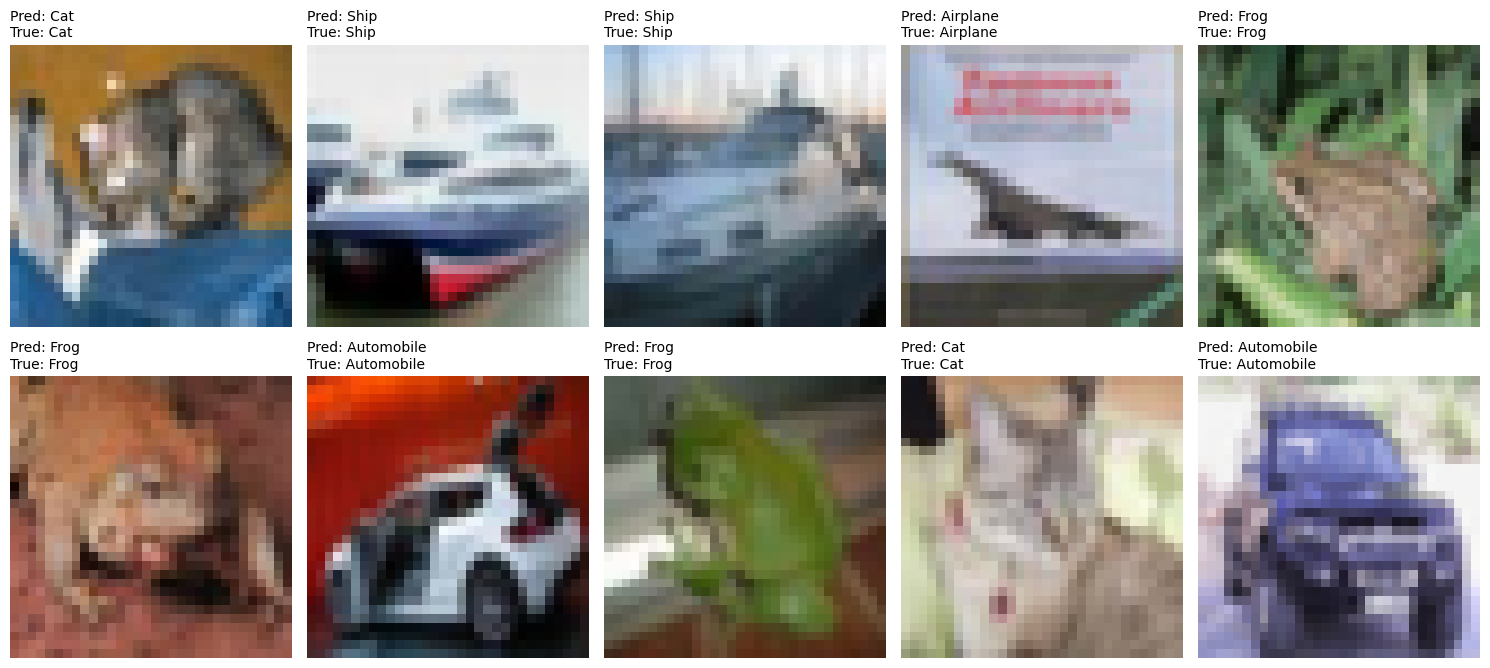

In [13]:

def plot_images(images, predicted_categories, true_categories):
    import matplotlib.pyplot as plt

    cls_nm = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] 

    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    for j, axe in enumerate(axes.flat):
        pd = cls_nm[predicted_categories[j]]
        tr = cls_nm[true_categories[j]]
        axe.set_title(f"Pred: {pd}\nTrue: {tr}", loc='left', fontsize=10)
        axe.imshow(images[j])
        axe.axis('off')

    plt.tight_layout()
    plt.show()


plot_images(x_test[:10], pred_cls[:10], np.argmax(y_test[:10], axis=1))


